Data Exploration

1. Load the Short-term Daily Precipitation Forecasting dataset.

2. Explore the dataset and understand its structure.

In [1]:
import pandas as pd

df = pd.read_csv("weatherHistory.csv")
df.head()
print(df.describe())
print(df.info())
print(df.dtypes)


       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


Data Normalization

1. Perform Min-Max normalization on the precipitation values.

2. Create a new column, e.g., Precipitation_normalized to store the normalized values.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Temperature_normalized (C)'] = scaler.fit_transform(df[['Temperature (C)']])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature_normalized (C)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.506975
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.505085
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.505445
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.487805
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.495365


Data Reduction

1. Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

2. Reduce the dataset to a 2D representation using PCA.

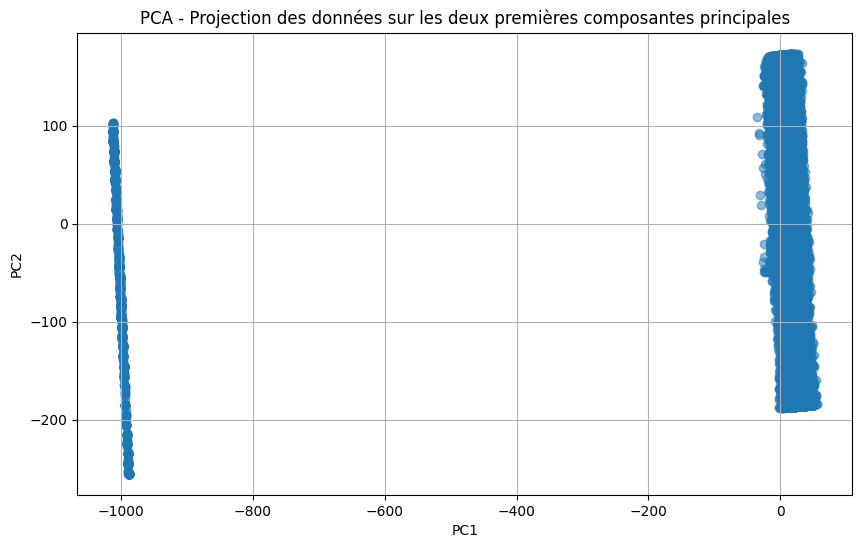

In [8]:
from sklearn.decomposition import PCA

#This line creates an instance of the PCA class with the parameter n_components set to 2. It specifies that we want to reduce the dimensionality of the data to 2 principal components. In other words, the data will be projected into a 2D space.
# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[numeric_cols])

reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

reduced_df.head()

import matplotlib.pyplot as plt

# Visualiser les résultats avec un graphique de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.title('PCA - Projection des données sur les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

Data Aggregation

1. Group the data by location and calculate the average precipitation for each location.

2. Create a new dataset with the aggregated values.

In [9]:
average_temperature = df.groupby('Humidity')['Temperature (C)'].mean()

average_temperature.head()

Humidity
0.00   -13.560606
0.12    13.888889
0.13    39.905556
0.14    32.637500
0.15    25.514444
Name: Temperature (C), dtype: float64